<a href="https://colab.research.google.com/github/Echevarriaj93/DeepLearningProjects/blob/main/Jose_Echevarria_Keras_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Models: Sequential vs. Functional

As possibly the most popular Application Programming Interface (API) of `tensorflow`,  `keras` provides a lot of convenience with us when building deep learning models. 

In the past, we have been use the base `tensorflow` package to build our deep learning models. The problem with that is it is very difficult and tedious to build these models in `tensorflow` since you have to build every layer and every functionality from scratch. By using `keras`, we make use of the _pre-packaged_ layers and functions where we can build the models in a much easier and more concise fashion. 

In this tutorial, we are going to learn how to implement deep learning models using the `sequential` and `functional` APIs in `keras`. Also, we are going to discuss the main differences between the two APIs, as well as the pros and cons. Hopefully through this tutorial you can gain an idea of how/when/why to use the `sequential` and `functional` APIs in different scenarios.

To fully test our implementations of models are correct, we are going to use the famous `MNIST` dataset in these models. 

Let's load and prepare the dataset as follows.

In [2]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

11490434/11490434 [==============================] - 0s 0us/step
60000 train samples
10000 test samples


Usually, for any deep learning notebooks, we need to specify some important hyperparameters, including `batch_size` and `epochs`. We will discuss what they mean in the lecture part. But for now we are using the standard setting of them for the `MNIST` dataset.

In [3]:
batch_size = 128
epochs = 20

Addtionally, we need to tell how many classes are in the classification problem.

In [4]:
num_classes = 10

We also need to further prepare the labels (`y_train` and `y_test`) by letting the models know they are categorical. `keras` provides a function for that.

In [5]:
from tensorflow.keras.utils import to_categorical#, plot_model
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

## Sequential Models

A `sequential` model, as the name suggests, allows you to create models __layer-by-layer__ in a __step-by-step__ fashion.

Keras Sequential API is by far the easiest way to get up and running with Keras, but it’s also the most limited — you cannot create models that:

- Share layers among different neural nets
- Have branches (at least not easily) in the model structure
- Have multiple inputs
- Have multiple outputs

A lot of famous network models are implemented using the `sequential` API. For instance, the famous VGG model (which we will see later in this course) is implemented using the `sequential` API.

The `Sequential` API is available in `tensorflow.keras.models`.

You can import it this way.

In [6]:
from tensorflow.keras.models import Sequential

![seq-model1](https://drive.google.com/uc?id=1KaDJRV6wQtRtmTcSdVmCGIV_a5fYBH4a)

For instance, if we want to implement a simple MLP model like above, we can use the following code for that.

In [7]:
from tensorflow.keras.layers import Dense, Dropout

# sequential model 1
model1 = Sequential()
# we can add the layers in order using the `.add` method
model1.add(Dense(512, activation='relu', input_shape=(784,)))
model1.add(Dropout(0.2)) # dropout layers are used to avoid overfitting our model
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(10, activation='softmax'))

# we should always verify the model architecture
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


We can now finish the implementation of `model1` using the `compile` method. The `compile` method at the minimum defines:
- the loss function (how does your model measures error)
- the optimizer (how to search for the best weights on all the neurons)
- the evaluation metric (how do you evaluate the model)

Keep in mind the `loss function` is used internnally - so that the `optimizer` is working on _reducing_ loss; while the evaluation metric is used externally for us to evaluate/compare models. 

In [78]:
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

The rest of the process is very similar to the machine learning process (e.g. with `sklearn`) where you need to:
- fit the model to the training data
- evalute the model with the testing data

A few things are different:
- We usually record the fitted model in a variable (normally named `history`) since the training history is important in deep learning
- the `.fit()` method in `keras` allows reserving a portion of data for the validation purposes - the recommendation is always at least use `10%` of the data for that.

In [9]:
history1 = model1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score1 = model1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score1[0])
print('Test accuracy:', score1[1])

Epoch 1/20
469/469 [==============================] - 14s 27ms/step - loss: 0.2529 - accuracy: 0.9239 - val_loss: 0.1022 - val_accuracy: 0.9678
Epoch 2/20
469/469 [==============================] - 12s 25ms/step - loss: 0.1011 - accuracy: 0.9689 - val_loss: 0.0786 - val_accuracy: 0.9753
Epoch 3/20
469/469 [==============================] - 10s 22ms/step - loss: 0.0719 - accuracy: 0.9767 - val_loss: 0.0745 - val_accuracy: 0.9760
Epoch 4/20
469/469 [==============================] - 13s 28ms/step - loss: 0.0539 - accuracy: 0.9831 - val_loss: 0.0759 - val_accuracy: 0.9765
Epoch 5/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0453 - accuracy: 0.9858 - val_loss: 0.0613 - val_accuracy: 0.9792
Epoch 6/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0395 - accuracy: 0.9869 - val_loss: 0.0735 - val_accuracy: 0.9799
Epoch 7/20
469/469 [==============================] - 13s 27ms/step - loss: 0.0340 - accuracy: 0.9890 - val_loss: 0.0645 - val_accuracy:

We can actually plot out the training and testing histories as below. This is the recommended common practice.

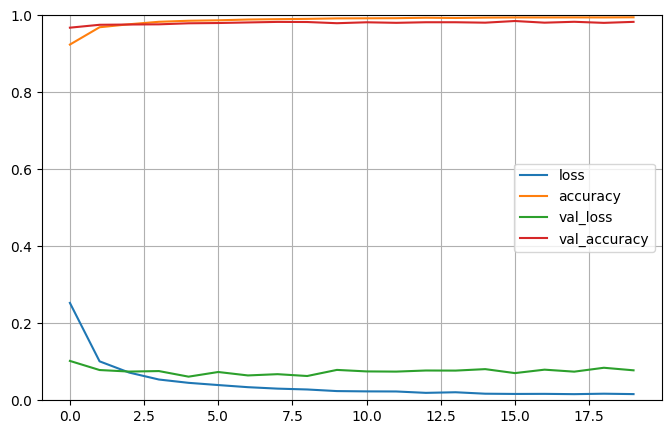

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

Did you notice the activation funtions we used in `model1`? The `Sequential` API actually allows us to add the layer then the activation separately. See the example below.

In [11]:
# to use the activation function separately we need to import below
from tensorflow.keras.layers import Activation

model2 = Sequential()
# first dense layer with dropout
model2.add(Dense(512, input_shape=(784,)))
model2.add(Activation("relu"))
model2.add(Dropout(0.2))

# second dense layer with dropout
model2.add(Dense(512))
model2.add(Activation("relu"))
model2.add(Dropout(0.2))

# the classification layer with softmax activation
model2.add(Dense(10))
model2.add(Activation("softmax"))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 10)               

Do not get confused with above model architecture - even though you see more items in the model summary, we still only have three layers:

- The first Dense layer (activation: `relu`) with Dropout
- The second Dense layer (activation: `relu`) with Dropout
- The third Dense layer (activation: `softmax`) to make the multi-class classification


The `compile`, `fit`, and `evaluate` are very simialr for `model2`, compared to `model1`.

In [12]:
# compile model2
model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# fit model2 to training data
history2 = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score2 = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Epoch 1/20
130/469 [=======>......................] - ETA: 8s - loss: 1.9632 - accuracy: 0.4489

KeyboardInterrupt: ignored

We notice that the results are a little bit different because of the different optimizer (`sgd` vs `adam`) used. 

We can plot the training/testing processes again.

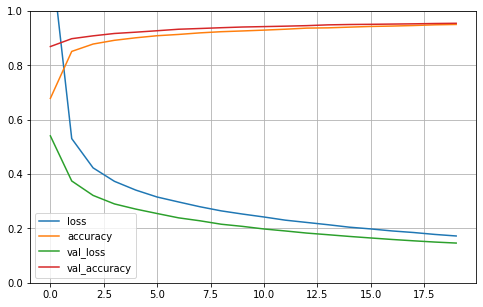

In [ ]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

## Functional Models

Once you’ve had some practice implementing a few basic neural network architectures using Keras’ `Sequential` API, you’ll then want to gain experience working with the `Functional` API.

Keras’ `Functional` API is easy to use and is typically favored by most deep learning practitioners who use the Keras deep learning library. Also, it provides great flexibility when implementing your models.

Using the Functional API you can:

- Create more complex models.
- Have multiple inputs and multiple outputs.
- Easily define branches in your architectures (ex., an Inception block, ResNet block, etc.).
- Design directed acyclic graphs (DAGs).
- Easily share layers inside the architecture.

Furthermore, any `Sequential` model can be implemented using Keras’ `Functional` API. 

You can import the `Functional` API like below.

In [32]:
from tensorflow.keras.models import Model

For instance, a very popular computer vision network, GoogleNet, has a complex structure like below. This structure is implemented using the `Functional` API, and cannot be implemented using the `Sequential` API.

![MiniGoogleNet](https://www.pyimagesearch.com/wp-content/uploads/2019/10/keras_3_model_types_minigooglenet.png)

We can implement `model1/model2` using the `Functional` API as below.

![seq-model1](https://drive.google.com/uc?id=1KaDJRV6wQtRtmTcSdVmCGIV_a5fYBH4a)

In [33]:
# functional model 3

# for the functional model we need to use the Input layer
# from tensorflow.keras.layers import Input
from keras.layers import Input
inp_layer = Input(shape=(784,))
# note the name the layers and how we use them the pair the layers
# you can think of the layer names as outputs
# and the name in () ending each line as input to each layer
x = Dense(512, activation='relu')(inp_layer)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
out_layer = Dense(10, activation='softmax')(x)
# we assemble the model by defineing the input and the output of the model
# the inner connection of the layers are implemented though the pairing above
model3 = Model(inputs=inp_layer, outputs=out_layer)
# we should always verify the model architecture
model3.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_70 (Dense)            (None, 512)               401920    
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_71 (Dense)            (None, 512)               262656    
                                                                 
 dropout_11 (Dropout)        (None, 512)               0         
                                                                 
 dense_72 (Dense)            (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable

Even though we used the `Functional` API here, the `compile`, `fit`, and `evaluate` are very simialr for `model3`, compared to `model1/model2`.

In [34]:
# compile model2
model3.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

# fit model2 to training data
history3 = model3.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score3 = model3.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score3[0])
print('Test accuracy:', score3[1])

Epoch 1/20
 27/469 [>.............................] - ETA: 12s - loss: 2.2680 - accuracy: 0.1513

KeyboardInterrupt: ignored

Similarly, we can plot the training/testing processes of `model3` again.

In [35]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

NameError: ignored

## Advanced Use of the `Functional` API

You should already noticed that implementing the same model, if the model architecture is too simple (like the MLP ones), there is no benefit of using the `Functional` API.

The main benefit of using the `Functional` API is to implement more complex models. One of these complex models is the Convolutional Neural Networks (CNNs). We will discuss how CNNs work later in the lecture, but one thing you want to remember here is that the CNNs use the convolution layers - and each convolution layer (`Conv2D`) needs to be paired with a pooling layer (`Maxpooling2D`). If we are using the `Sequential` API, they need to be added in order.

In [36]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
input_shape = (28, 28, 1)
model5 = Sequential()
model5.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model5.add(Conv2D(64, (3, 3), activation='relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.25))
model5.add(Flatten())
model5.add(Dense(128, activation='relu'))
model5.add(Dropout(0.5))
model5.add(Dense(num_classes, activation='softmax'))

model5.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_15 (Flatten)        (None, 9216)              0         
                                                                 
 dense_73 (Dense)            (None, 128)               1179776   
                                                      

We can visualize `model5` to see that the `Conv2D` and the `MaxPooling2D` are indeed sequential in the model.

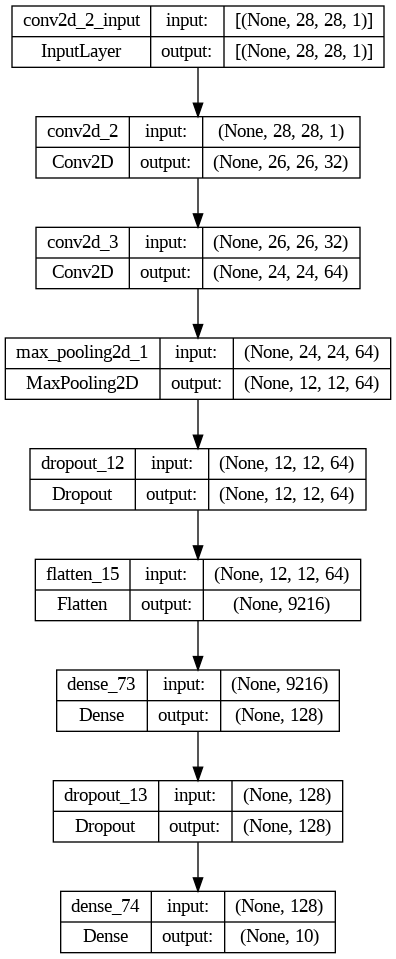

In [37]:
from tensorflow.keras.utils import plot_model

plot_model(model5, show_shapes=True, show_layer_names=True)

With the help of the `Functional` API, we can have layers in parallel. See `model6` below.

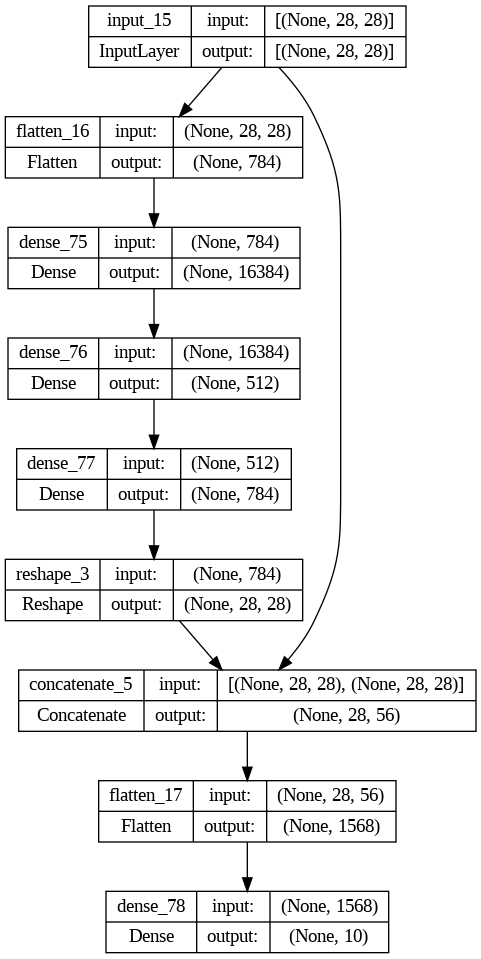

In [38]:
from tensorflow.keras.layers import Concatenate, Reshape
input_ = Input(shape=[28, 28])
flatten = Flatten(input_shape=[28, 28])(input_)
hidden1 = Dense(2**14, activation="relu")(flatten)
hidden2 = Dense(512, activation='relu')(hidden1)
hidden3 = Dense(28*28, activation='relu')(hidden2)
reshap = Reshape((28, 28))(hidden3)
concat_ = Concatenate()([input_, reshap])
flatten2 = Flatten(input_shape=[28, 28])(concat_)
output = Dense(10, activation='softmax')(flatten2)
model6 = Model(inputs=[input_], outputs=[output] )
plot_model(model6, show_shapes=True, show_layer_names=True)

As a matter of fact, we can even have multiple inputs/outputs in a deep learing model, with the help of the `Functional` API. See `model7` below.

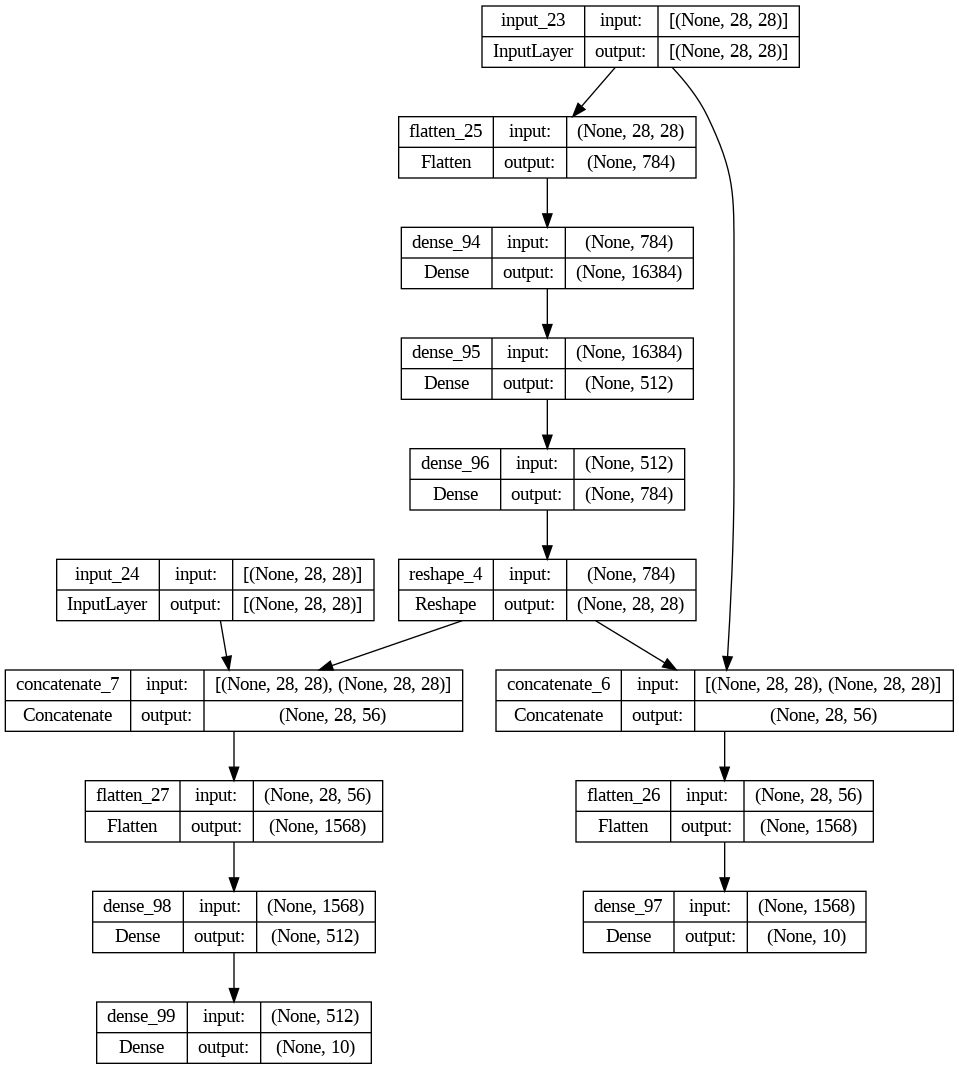

In [46]:
input_A = Input(shape=[28, 28])
input_B = Input(shape=[28, 28])

flatten = Flatten(input_shape=[28, 28])(input_A)
hidden1 = Dense(2**14, activation="relu")(flatten)
hidden2 = Dense(512, activation='relu')(hidden1)
hidden3 = Dense(28*28, activation='relu')(hidden2)
reshap = Reshape((28, 28))(hidden3)
concat_A = Concatenate()([input_A, reshap])
flatten_A = Flatten(input_shape=[28, 28])(concat_A)
output = Dense(10, activation='softmax')(flatten_A)


concat_B = Concatenate()([input_B, reshap])
flatten_B = Flatten(input_shape=[28, 28])(concat_B)

hidden_B = Dense(512, activation='relu')(flatten_B)
output_2nd = Dense(10, activation='softmax')(hidden_B)


model7 = Model(inputs=[input_A, input_B], outputs=[output, output_2nd])

plot_model(model7, show_shapes=True, show_layer_names=True)

## Conclusion

As a summary, we provide the pros and cons of both the `Sequential` and the `Functional` APIs as below.

Sequential API: 

- Pros:
  - basic – simple to use;
  - allows you to create models layer-by-layer
- Cons:
  - not very flexible, making it difficult to make models with multi-input, multi-output or shared-layers

Functional API
- pros:
  - flexible model architecture (each layer can be connected in a pairwise fashion)
  - can create complex networks such as siamese networks and residual networks
- cons:
- needs a standalone “Input” layer at the top to specify the shape of input data

## References 

This tutorial is built based on following sources.

1. [3 ways to create a Keras model with TensorFlow](https://www.pyimagesearch.com/2019/10/28/3-ways-to-create-a-keras-model-with-tensorflow-2-0-sequential-functional-and-model-subclassing/)
2. [Keras MNIST CNN doc](https://keras.io/examples/vision/mnist_convnet/)
3. [Keras MNIST MLP doc](https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter1-keras-quick-tour/mlp-mnist-1.3.2.py)
4. [Sequential API vs Functional API model in Keras](https://medium.com/@hanify/sequential-api-vs-functional-api-model-in-keras-266823d7cd5e)
5. [Modeling with Keras | Sequential vs Functional](https://thetechnopaedia.wordpress.com/2018/03/17/modeling-with-keras-sequential-vs-functional/)

## YOUR TURN HERE

Complete these homework questions.

### Q1. Create a deep learning model as following using the `Sequential` API.

Use the `plot_model()` function to print out the model architecture.

![Question1-architecture](https://drive.google.com/uc?id=1IsnvnYCooZ5NyZasrwebx5ioyIpX5CTT)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 28, 256)           7424      
                                                                 
 dense_33 (Dense)            (None, 28, 128)           32896     
                                                                 
 dense_34 (Dense)            (None, 28, 64)            8256      
                                                                 
 dense_35 (Dense)            (None, 28, 64)            4160      
                                                                 
 dense_36 (Dense)            (None, 28, 2)             130       
                                                                 
Total params: 52,866
Trainable params: 52,866
Non-trainable params: 0
_________________________________________________________________


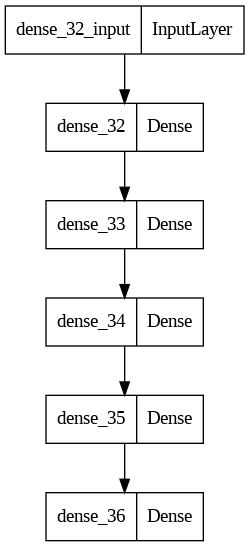

In [21]:
model = Sequential([Dense(units=256, activation='relu', input_shape=(28,28)),
                    Dense(128, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(64, activation='relu'),
                    Dense(2, activation='sigmoid')
])

model.summary()

plot_model(model)

### Q2. Creating a deep learning model as following using the `Functional` API.

Use the `plot_model()` function to print out the model architecture.

![model-archit2](https://drive.google.com/uc?id=1qRWNGqabhWDZa3DF6XVujh9GuXwKhNO6)

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_56 (InputLayer)          [(None, 28, 28)]     0           []                               
                                                                                                  
 flatten_59 (Flatten)           (None, 784)          0           ['input_56[0][0]']               
                                                                                                  
 dense_203 (Dense)              (None, 512)          401920      ['flatten_59[0][0]']             
                                                                                                  
 dense_206 (Dense)              (None, 512)          401920      ['flatten_59[0][0]']             
                                                                                           

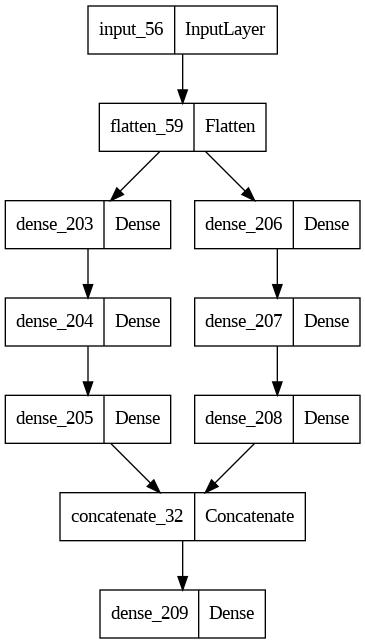

In [88]:
input = Input(shape=[28,28])

flatten = Flatten()(input)

#branch 1
h1a = Dense(512, activation='relu')(flatten)
h2a = Dense(units=256, activation='relu')(h1a)
h3a = Dense(128, activation='relu')(h2a)

#Branch 2

h1b = Dense(512, activation='tanh')(flatten)
h2b = Dense(256, activation='tanh')(h1b)
h3b = Dense(128, activation='tanh')(h2b)


#converge
concat = Concatenate()([h3a,h3b])
output = Dense(10, activation = 'softmax')(concat)




model = Model(input, output)

model.summary()

plot_model(model)

In [86]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [87]:
#in order to fit this particular data the shape needs to be 784,. Chnaged shape back to 28,28 above for assingment compleition. 
#Copy saved in GIT.

model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=.3)
score1 = model1.evaluate(x_test, y_test, verbose=2)

Epoch 1/20
329/329 [==============================] - 15s 41ms/step - loss: 0.2417 - accuracy: 0.9268 - val_loss: 0.1358 - val_accuracy: 0.9582
Epoch 2/20
329/329 [==============================] - 13s 40ms/step - loss: 0.0917 - accuracy: 0.9710 - val_loss: 0.0981 - val_accuracy: 0.9698
Epoch 3/20
329/329 [==============================] - 13s 40ms/step - loss: 0.0567 - accuracy: 0.9822 - val_loss: 0.1186 - val_accuracy: 0.9646
Epoch 4/20
329/329 [==============================] - 17s 51ms/step - loss: 0.0410 - accuracy: 0.9866 - val_loss: 0.1069 - val_accuracy: 0.9704
Epoch 5/20
329/329 [==============================] - 18s 55ms/step - loss: 0.0317 - accuracy: 0.9895 - val_loss: 0.1022 - val_accuracy: 0.9743
Epoch 6/20
329/329 [==============================] - 16s 48ms/step - loss: 0.0230 - accuracy: 0.9924 - val_loss: 0.1146 - val_accuracy: 0.9710
Epoch 7/20
329/329 [==============================] - 14s 44ms/step - loss: 0.0175 - accuracy: 0.9944 - val_loss: 0.1231 - val_accuracy: